In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization

In [3]:
# Generator

train_ds = keras.utils.image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalize

def process(image,label):
    image = tf.cast(image/255., tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
625/625 [==============================] - 1569s 2s/step - loss: 1.4874 - accuracy: 0.5239 - val_loss: 0.7043 - val_accuracy: 0.5048
Epoch 2/3
625/625 [==============================] - 1564s 2s/step - loss: 0.7049 - accuracy: 0.5130 - val_loss: 0.6900 - val_accuracy: 0.5138
Epoch 3/3
625/625 [==============================] - 1379s 2s/step - loss: 0.7048 - accuracy: 0.5050 - val_loss: 0.7008 - val_accuracy: 0.5092


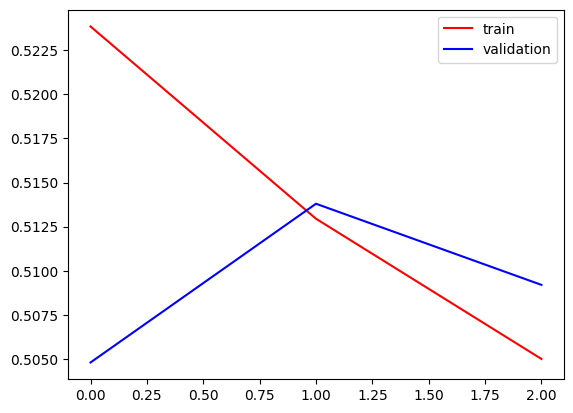

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

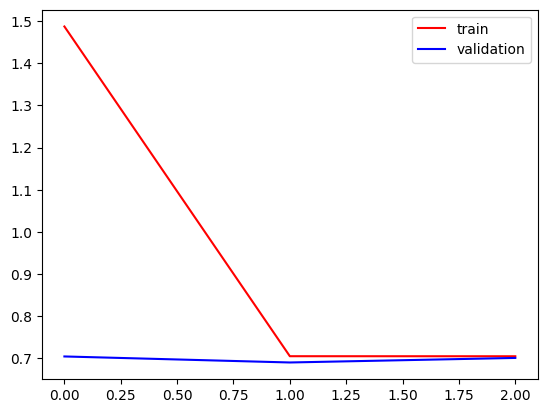

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce Overfitting

# Add more data
# Data Augumentation
# L1 / L2 Regularization
# Dropout
# Batch Norm
# Reduce Complexity

In [13]:
import cv2

In [14]:
test_img = cv2.imread('dog.png')

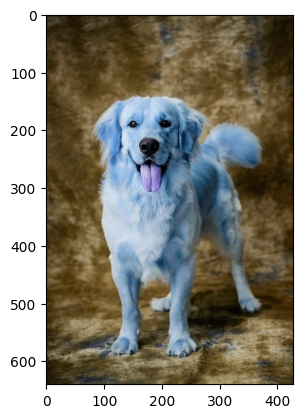

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(640, 427, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 423ms/step


array([[0.5045199]], dtype=float32)